In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl


In [3]:
pip install --upgrade tensorflow

  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-1.30.0-py2.py3-none-any.whl (146 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached re

In [8]:
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

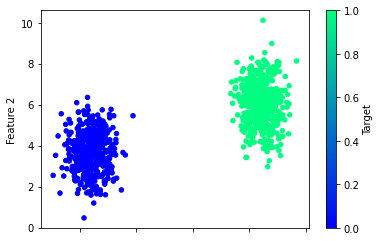

In [4]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [5]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [10]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [12]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [13]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 966us/step - loss: 1.4556 - accuracy: 0.0078
Epoch 2/100
24/24 [==============================] - 0s 940us/step - loss: 1.4037 - accuracy: 0.0061
Epoch 3/100
24/24 [==============================] - 0s 950us/step - loss: 1.3103 - accuracy: 0.0075
Epoch 4/100
24/24 [==============================] - 0s 917us/step - loss: 1.2936 - accuracy: 0.0111
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2728 - accuracy: 0.0100
Epoch 6/100
24/24 [==============================] - 0s 967us/step - loss: 1.1875 - accuracy: 0.0121
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1622 - accuracy: 0.0127
Epoch 8/100
24/24 [==============================] - 0s 966us/step - loss: 1.1120 - accuracy: 0.0162
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0980 - accuracy: 0.0076
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0599 - accuracy: 0.01

24/24 [==============================] - 0s 768us/step - loss: 0.6929 - accuracy: 0.5126
Epoch 83/100
24/24 [==============================] - 0s 791us/step - loss: 0.6926 - accuracy: 0.5191
Epoch 84/100
24/24 [==============================] - 0s 778us/step - loss: 0.6936 - accuracy: 0.4949
Epoch 85/100
24/24 [==============================] - 0s 750us/step - loss: 0.6938 - accuracy: 0.4889
Epoch 86/100
24/24 [==============================] - 0s 802us/step - loss: 0.6933 - accuracy: 0.5017
Epoch 87/100
24/24 [==============================] - 0s 793us/step - loss: 0.6926 - accuracy: 0.5205
Epoch 88/100
24/24 [==============================] - 0s 790us/step - loss: 0.6925 - accuracy: 0.5224
Epoch 89/100
24/24 [==============================] - 0s 728us/step - loss: 0.6940 - accuracy: 0.4811
Epoch 90/100
24/24 [==============================] - 0s 846us/step - loss: 0.6933 - accuracy: 0.5001
Epoch 91/100
24/24 [==============================] - 0s 752us/step - loss: 0.6941 - accuracy: 

<AxesSubplot:>

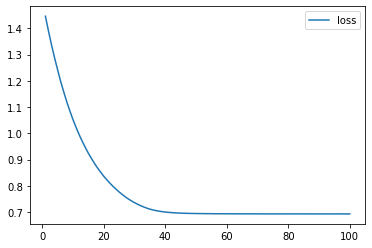

In [16]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

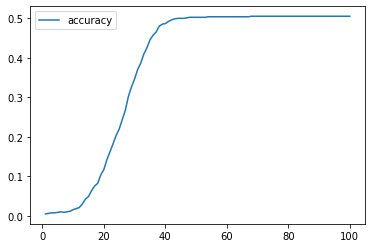

In [17]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6941 - accuracy: 0.4800
Loss: 0.694073498249054, Accuracy: 0.47999998927116394


In [19]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

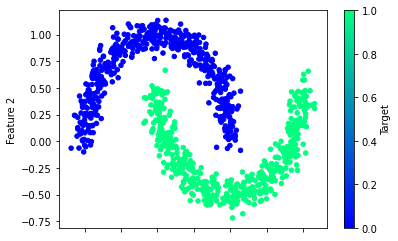

In [20]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [22]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [23]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5307
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5307
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5307
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5307
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 93/100


<AxesSubplot:>

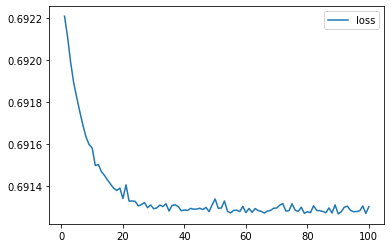

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

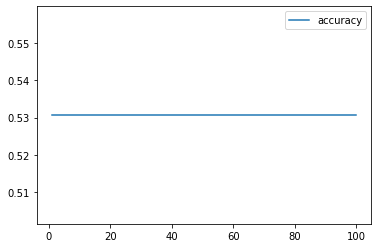

In [25]:
# Plot the loss
history_df.plot(y="accuracy")

In [26]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [28]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [29]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.7184 - accuracy: 0.4927
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7034 - accuracy: 0.4950
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.4789
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.4484
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.4680
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5669
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5994
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.6314
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.5898
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.6306
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.0944 - accuracy: 0.9900
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9953
Epoch 84/100
24/24 [==============================] - 0s 977us/step - loss: 0.0882 - accuracy: 0.9918
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9936
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9931
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 0.9900
Epoch 88/100
24/24 [==============================] - 0s 983us/step - loss: 0.0708 - accuracy: 0.9962
Epoch 89/100
24/24 [==============================] - 0s 991us/step - loss: 0.0711 - accuracy: 0.9931
Epoch 90/100
24/24 [==============================] - 0s 885us/step - loss: 0.0732 - accuracy: 0.9942
Epoch 91/100
24/24 [==============================] - 0s 900us/step - loss: 0.0671 - accuracy: 0.9964
Epo